<a href="https://colab.research.google.com/github/18K41A0524/NNDL/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_excel("/content/pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


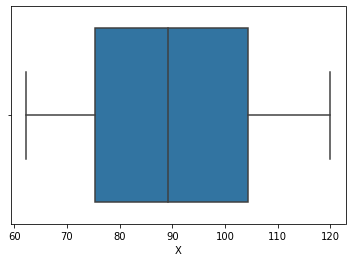

In [5]:
sns.boxplot(x=data['X'])

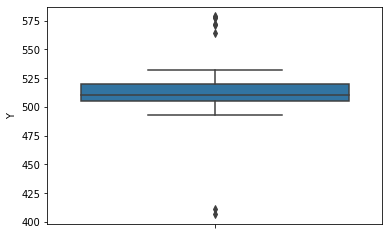

In [6]:
sns.boxplot(y=data['Y'])

In [7]:
f_data = data[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [8]:
print(len(data))
print(len(f_data))
if(len(data) == len(f_data)):
    print('No outliners')

30
30
No outliners


In [9]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [10]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

27


,X,Y
19,0.747405,0.606166
1,0.209343,0.990692
20,0.456747,0.574171
27,0.340830,0.600931
17,0.271626,0.602094


In [12]:
xa = np.array(train_data['X'])
ya = np.array(train_data['Y'])

In [13]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values 
m1 = -1.0 
c1 = 1.0  #variable x, y
itr = 100  #epoches
learning_rate = 0.1  #learning rate
for i in range(0,itr):
    dfmv1 = 0
    dfcv1 = 0
    er = 0
    for j in range(0,len(xa)):
        er +=  ((ya[j] - (m1 * xa[j]) - c1))**2
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, xa[j]) 
        dfmv = dfmv.subs(y, ya[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, xa[j]) 
        dfcv = dfcv.subs(y, ya[j]) 
        dfcv = round(dfcv,2)
        dfmv1 += dfmv
        dfcv1 += dfcv
    dfmv1 = dfmv1/len(xa)
    dfcv1 = dfcv1/len(xa)
    
    dfmv1 = round(dfmv1,2)
    dfcv1 = round(dfcv1,2)
    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm
    m1 = round(m1, 2) 
    c1 = c1 + dc
    c1 = round(c1, 2)
    er = (1/(2*len(train_data['X'])))*(er)
    err.append(er)
    #step5 increment iterations 
    #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
-0.83 1.04
minimum value obtained at m = -0.83 ,c =1.04 for given function


In [14]:
train_data_pred =  m1*train_data['X'] + c1

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.08342092564778435

Text(0.5, 1.0, 'predicted data vs actual data')

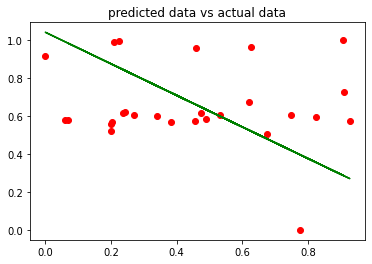

In [15]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title('predicted data vs actual data')

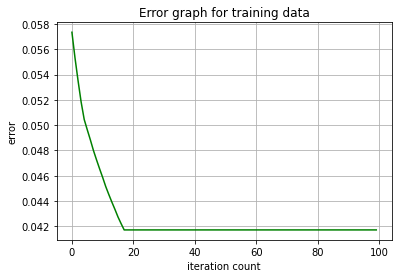

In [16]:
iters = np.arange(itr)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [17]:
test_data_pred = m1 *test_data['X'] + c1
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2

0.08374236152079219

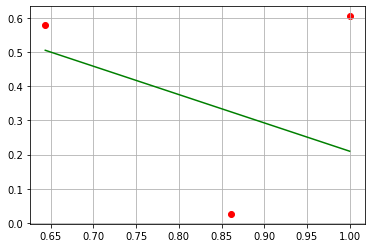

In [18]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [19]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

In [20]:
x =x1 = float(input("enter pressure of liquid nitrogen value :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen based on its pressure {x1} is : {y}")

enter pressure of liquid nitrogen value :80.2
weight of liquid nitrogen based on its pressure 80.2 is : 541.046248851103
